In [98]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [99]:
seed = 21

In [100]:
from keras.datasets import cifar10

In [101]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [102]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [103]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train / 255.0
X_test = X_test /255.0

In [104]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [105]:
model = Sequential()

In [106]:
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding="same"))
model.add(Activation("relu"))

In [107]:
model.add(Dropout(0.2))

In [108]:
model.add(BatchNormalization())

In [109]:
model.add(Conv2D(64, (3,3), padding = "same"))
model.add(Activation("relu"))

In [110]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [111]:
model.add(Conv2D(64, (3,3), padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding = "same"))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [112]:
model.add(Flatten())
model.add(Dropout(0.2))

In [113]:
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [114]:
model.add(Dense(class_num))
model.add(Activation("softmax"))

In [115]:
epochs = 25
optimizer = "Adam"

In [116]:
model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics=["accuracy"])

In [117]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_14 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 dropout_14 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 activation_15 (Activation)  (None, 32, 32, 64)        0         
                                                      

In [118]:
numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Epoch 1/25
782/782 [==============================] - 23s 27ms/step - loss: 1.4926 - accuracy: 0.4719 - val_loss: 1.5537 - val_accuracy: 0.4593
Epoch 2/25
782/782 [==============================] - 20s 26ms/step - loss: 1.0198 - accuracy: 0.6389 - val_loss: 0.8704 - val_accuracy: 0.6894
Epoch 3/25
782/782 [==============================] - 20s 26ms/step - loss: 0.8568 - accuracy: 0.6969 - val_loss: 0.8142 - val_accuracy: 0.7133
Epoch 4/25
782/782 [==============================] - 20s 26ms/step - loss: 0.7648 - accuracy: 0.7321 - val_loss: 0.8152 - val_accuracy: 0.7087
Epoch 5/25
782/782 [==============================] - 20s 26ms/step - loss: 0.7121 - accuracy: 0.7518 - val_loss: 0.6975 - val_accuracy: 0.7527
Epoch 6/25
782/782 [==============================] - 20s 26ms/step - loss: 0.6694 - accuracy: 0.7656 - val_loss: 0.6507 - val_accuracy: 0.7725
Epoch 7/25
782/782 [==============================] - 21s 26ms/step - loss: 0.6281 - accuracy: 0.7808 - val_loss: 0.7330 - val_accuracy:

In [119]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 82.24%


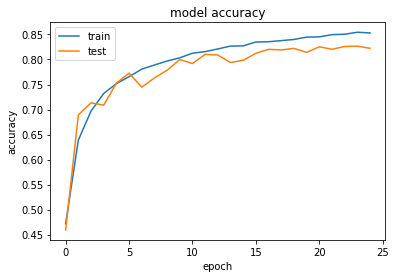

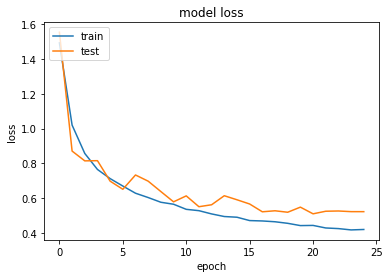

In [120]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()